## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 4
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with different types of data

----------------------------------------------------------

For this homework you will load the L data and practice making different kinds of plots!

This homework has **7 questions** from the lecture and **2 Problems** and a **Challenge**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the Data

In [2]:
file_location = 'https://joannabieri.com/introdatascience/data/loans_full_schema.csv'
DF = pd.read_csv(file_location)

### Check Observations and Variables

**Q1** How many **observations** are there?

**Q2** How many **variables** are there?

In [3]:
# Enter your code here to find the data shape
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


There are a total of 10,000 observations in the data set, although due to the limitations of my technology, I am only able to view 148. There are 55 variables being tracked.

### Reduce the number of variables

In [3]:
my_variables = ['loan_amount',
                'interest_rate',
                'term','grade',
                'state',
                'annual_income',
                'homeownership',
                'debt_to_income']

DF = DF[my_variables]

show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


**Q3** Check out each of the variables (columns):

1. What does each column tell you? What are the units?
2. Is the data numerical? If so is it continuous or discrete?
3. If the categorical? If so is it ordinal or nominal?

<a href="https://www.openintro.org/data/index.php?data=loans_full_schema"> Here is a link to the full data description if you need to look up some of the column names.</a>

-----------------------------------------

loan_amount: the amount of the loan that was given (in some form of currency? the website doesn't specify). the data is numerical, but doesn't have any decimal places, so it's also discrete.
interest_rate: the annual percent per year amount of interest that is owed on the loan. the interest rate is numerical and continuous.
term: the length of the loan in months. the term is numerical and discrete.
grade: a rating of how safe the loan is to give. the grade is categorical and ordinal.
state: the state the person receiving the loan lives in. the state is categorical and nominal.
annual_income: the annual income of the person receiving the loan (in the same currency as the loan probably). the annual income only changes in integers, so it's numerical and discrete.
home_ownership: the home ownership status of the person receiving the loan. the home ownership status is categorical and nominal.
debt_to_income: the total debt payments being made by the person receiving the loan over a period of time divided by their income over that period of time (expressed as a percentage, what percentage of their income is going straight to debt payments). the debt to income ratio is numerical and continuous.

### Here is Example Code for a simple Histogram

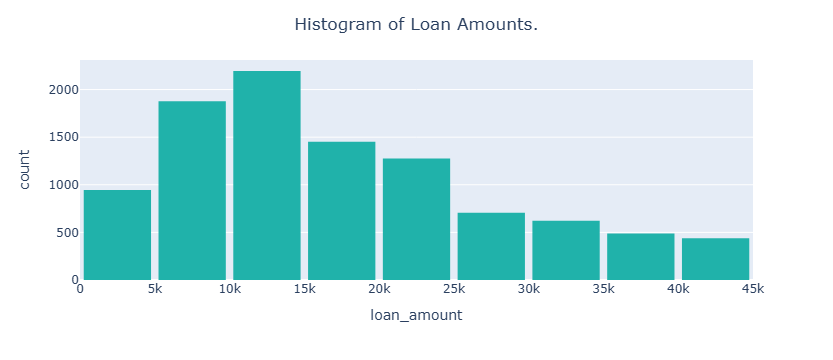

In [6]:
fig = px.histogram(DF,
                   nbins=10,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Amounts.',
                  title_x=0.5)
fig.show()

**Q4** You try changing the number of bins **nbins** what do you notice? Are there good choices? Bad choices?


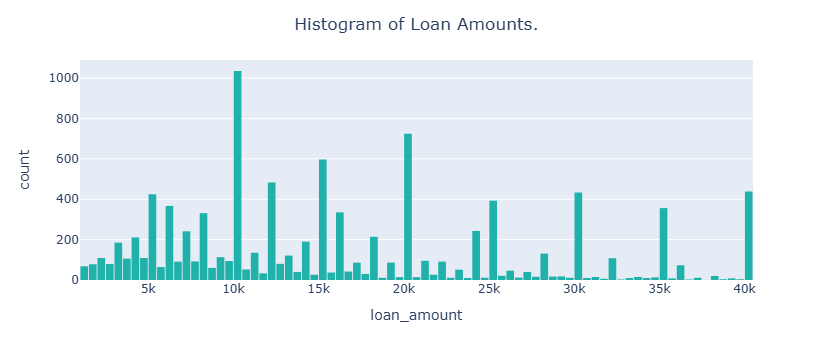

In [22]:
# Your code here (experiment here)
fig = px.histogram(DF,
                   nbins=80,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Amounts.',
                  title_x=0.5)
fig.show()

I'm noticing that the number of bins (nbins) that i'm setting it to is very often inaccurate. It's even inaccurate at the starting '10' nbins— there's actually only 9 bins there. It doesn't add more bins until you set it to 20 bins, where it decides "fine. you want more bins? here's more bins." and sets the graph to have 21 bins. It seems to only want to divide them by numbers it deems representable on the line, and it does so by limiting the amounts that divisions can be made at. 

**Problem 1** Create a histogram of your own! Try making a histogram of one of the other pieces of numerical data. Make it as fancy as you want. Include some categorical information. Do you learn anything from your graph? If so what?


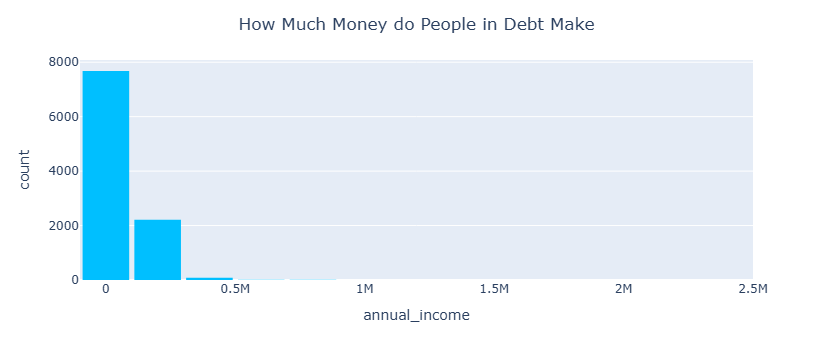

In [28]:
# Your code here
newfig = px.histogram(DF,
                   nbins=12,
                   x='annual_income',
                   color_discrete_sequence=['deepskyblue'])

newfig.update_layout(bargap=0.1,
                  title='How Much Money do People in Debt Make',
                  title_x=0.5)
newfig.show()

### Here is example code for a histogram with a box plot included.

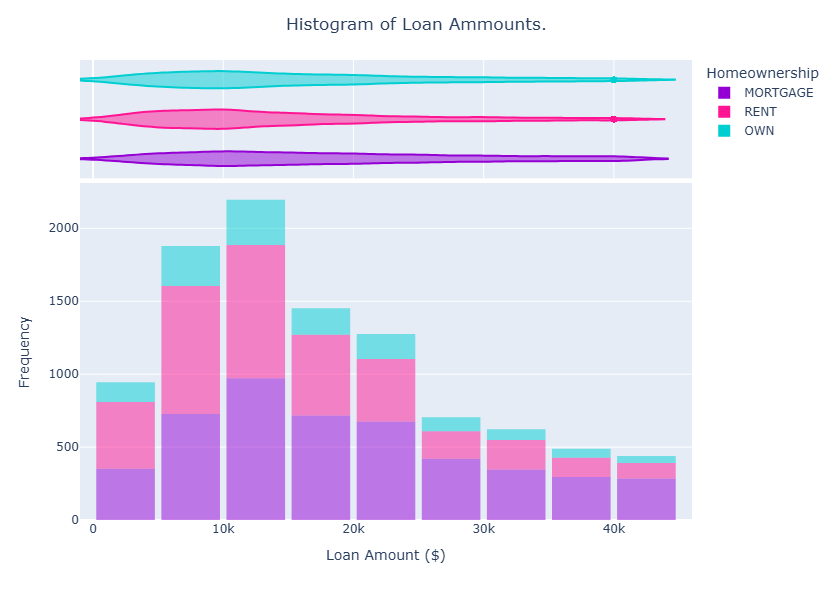

In [4]:
fig = px.histogram(DF,
                   nbins=9,
                   x='loan_amount',
                   color='homeownership',
                   opacity=0.5,
                   color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                   marginal="violin"
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

**Q5** Change the above plot to marginal="violin" and see what changes. Make some observations about the graph

It changes the marginal section of the graph to a violin plot. The graph is right-skewed, suggesting that the median loan is lower than the mean loan.  

In [30]:
counts = DF['homeownership'].value_counts()
show(counts)

Loading ITables v2.5.2 from the internet... (need help?)


**Q6** Copy and past the code above, but change it to get value counts for one of the other categorical columns

In [31]:
## Your code here
counts = DF['grade'].value_counts()
show(counts)

Loading ITables v2.5.2 from the internet... (need help?)


### Here is example code for a bar plot

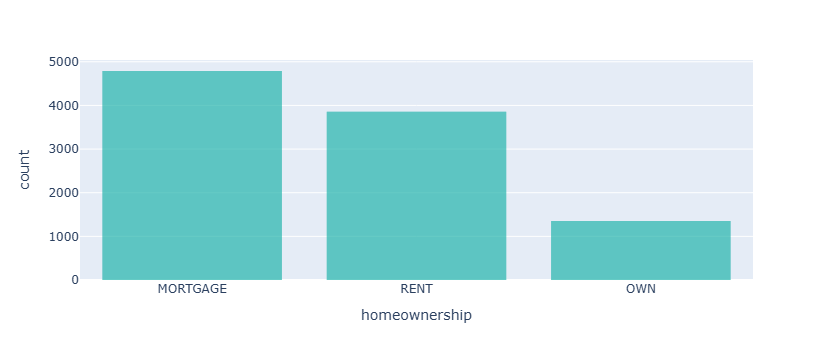

In [7]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.show()

**Q7** Can you figure out how to add x labels, y labels, and a title to this graph?

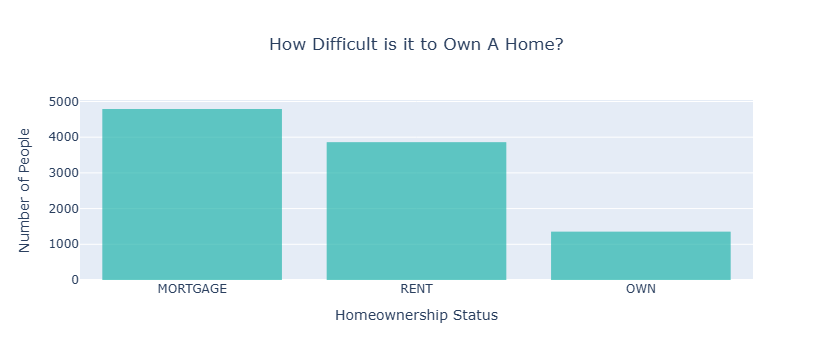

In [14]:
# Your code here
fig = px.bar(DF,
            x='homeownership',
            title='How Difficult is it to Own A Home?',
            labels={'homeownership':'Homeownership Status', 'count':'Number of People'},
            color_discrete_sequence=['lightseagreen'],
            )
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(
            title_x=0.5
            )
fig.show()

**Problem 2** Try to make your own bar plot of one of the other categorical columns. Add some categorical fill or facets. See how fancy you can make your graph. Make sure it is also still really informative.

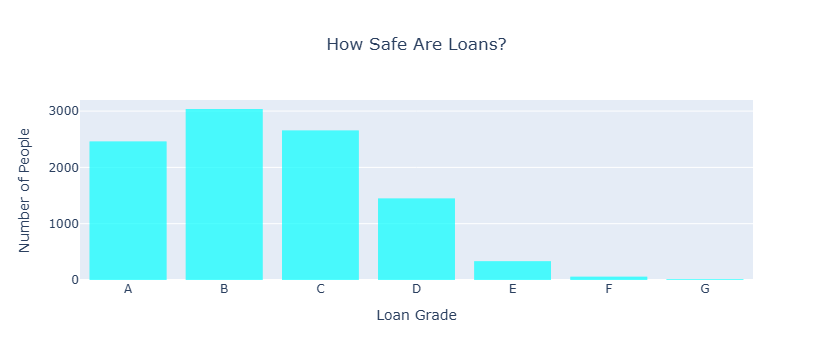

In [18]:
# Your code here
fig = px.bar(DF,
            x='grade',
            title='How Risky Are Loans Given Out?',
            labels={'grade':'Loan Grade', 'count':'Number of People'},
            color_discrete_sequence=['cyan'],
            )
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(
            title_x=0.5,
            xaxis={'categoryorder':'category ascending'}
            )
fig.show()

### Challenge:

Here is a data set that contains demographic data from the Behavioral Risk Factors Surveillance System from the CDC. It is a small subset of 60 observations.

Here is a link to the variable information:

<a href="https://www.openintro.org/data/index.php?data=cdc.samp" target="_blank">https://www.openintro.org/data/index.php?data=cdc.samp</a>

Your goal is to look at the columns and then make an graph from the data using what we learned in today's class.

In [15]:
file_location = 'https://joannabieri.com/introdatascience/data/cdc.samp.csv'
DF_new = pd.read_csv(file_location)
show(DF_new)

Loading ITables v2.5.2 from the internet... (need help?)


In [19]:
DF

,loan_amount,interest_rate,term,grade,state,annual_income,homeownership,debt_to_income
0,28000,14.07,60,C,NJ,90000.0,MORTGAGE,18.01
1,5000,12.61,36,C,HI,40000.0,RENT,5.04
2,2000,17.09,36,D,WI,40000.0,RENT,21.15
3,21600,6.72,36,A,PA,30000.0,RENT,10.16
4,23000,14.07,36,C,CA,35000.0,RENT,57.96
...,...,...,...,...,...,...,...,...
9995,24000,7.35,36,A,TX,108000.0,RENT,22.28
9996,10000,19.03,36,D,PA,121000.0,MORTGAGE,32.38
9997,30000,23.88,36,E,CT,67000.0,MORTGAGE,45.26
9998,24000,5.32,36,A,WI,80000.0,MORTGAGE,11.99


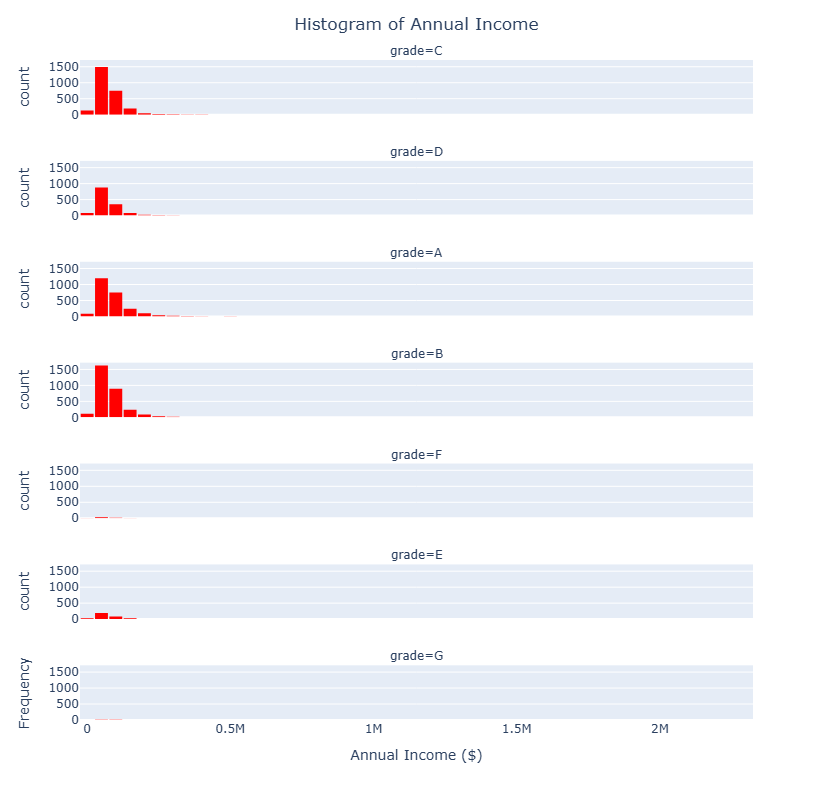

In [37]:
fig = px.histogram(DF,
                  x='annual_income',
                  nbins=64,
                  facet_col='grade',
                  facet_col_wrap=1,
                  color_discrete_sequence=['red'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Annual Income',
                  title_x=0.5,
                  xaxis_title="Annual Income ($)",
                  yaxis_title="Frequency",
                  autosize=False,
                  width=800,
                  height=800)

fig.show()